# 预备练习

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy
import pandas

In [3]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
# numel()查看元素个数
x.numel()

12

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2., 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0),  torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

## 广播机制
这种机制的工作方式如下：首先，通过适当复制元素来扩展一个或两个数组， 以便在转换之后，两个张量具有相同的形状。 其次，对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 张量转标量
调用torch的item()函数或python内置函数

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理

下面将数据集按行写入CSV文件

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


/var/folders/52/nlh_skfx3hl5v5ywv3xbbpzr0000gq/T/ipykernel_10100/38268100.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


one-hot encoding，用于处理非数值型数据。

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


使用张量函数将inputs和outputs的数值转换为张量

In [ ]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [ ]:
def drop_col(m):
    num = m.isna().sum()  # 获得缺失值统计信息
    num_dict = num.to_dict()  # 转为字典
    print(num, num_dict)
    max_key = max(num_dict, key=num_dict.get)  # 取字典中最大值的键
    del m[max_key]  # 删除缺失值最多的列
    return m


drop_col(data)

NumRooms    2
Alley       3
Price       0
dtype: int64 {'NumRooms': 2, 'Alley': 3, 'Price': 0}


,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


## 张量算法的基本性质

1.两个矩阵**按元素乘法**称为Hadamard积，数学符号为$\odot$，如A $\odot$ B。

In [12]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()   # 创建一个副本，分配新的内存
A * B # 按元素乘积 * 

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

2.将张量乘以或加上一个标量不会改变形状，其中张量的每个值都会与标量相乘或相加。

In [7]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## 降维

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A, A.mean(axis=0)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([ 8.,  9., 10., 11.]))

In [10]:
# 按行求累积和，此操作不会改变A的形状
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## 点积
$\mathbf{x}^\top\mathbf{y}$或是$\langle\mathbf{x},\mathbf{y}\rangle$，乘积结果是一个标量。

In [11]:
import numpy as np
x = torch.arange(4, dtype=torch.float32)
A, x, A@x

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

## 范数

欧几里得距离是一个L2范数，是向量元素平方和的平方根：  
$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$

In [13]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

L1范数，表示为向量元素的绝对值之和：  
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$$

In [14]:
torch.abs(u).sum()

tensor(7.)

In [ ]:
x = torch.arange(4., requires_grad=True)
y = 2 * torch.dot(x, x)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [ ]:
y.backward()
x.grad == 4 * x

tensor([True, True, True, True])

# 线性回归


## 线性回归的简洁实现


In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [ ]:
batch_size = 10
data_iter = d2l.load_array((features, labels), batch_size)
# next(iter(data_iter))

In [ ]:
from torch import nn
model = nn.Sequential(nn.Linear(2, 1))

# init params
model[0].weight.data.normal_(0, 0.01)
model[0].bias.data.fill_(0)
# loss
loss = nn.MSELoss()
# optimzer
optimzer = torch.optim.SGD(model.parameters(), lr=0.03)
# training
num_epoch = 3
for epoch in range(num_epoch):
    for X, y in data_iter:
        l = loss(model(X), y)
        optimzer.zero_grad()
        l.backward()
        optimzer.step()
#     用一次epoch得到的参数进行评估
    pred_loss = loss(model(features), labels)
    print(f'epoch {epoch+1}, loss {pred_loss:f}')

epoch 1, loss 0.000259
epoch 2, loss 0.000102
epoch 3, loss 0.000102


## softmax 回归


$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$
 
这里，对于所有的 𝑗 总有 0≤𝑦̂ 𝑗≤1 。 因此， 𝐲̂  可以视为一个正确的概率分布。 softmax运算不会改变未规范化的预测 𝐨 之间的顺序，只会确定分配给每个类别的概率。 因此，在预测过程中，我们仍然可以用下式来选择最有可能的类别。

$$\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j$$
 
尽管softmax是一个非线性函数，但softmax回归的输出仍然由输入特征的仿射变换决定。 因此，softmax回归是一个线性模型（linear model）。

### 从零实现


In [ ]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)

batch_size = 256
def get_dataloader_workers():  #@save
    """使用4个进程来读取数据。"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True)

# 查看读取训练集所需时间
cost = d2l.Timer()
for X, y in train_iter:
    continue
f'{cost.stop():.2f} sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):  # @save
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))


# 测试
# train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
# for X, y in train_iter:
#     print(X.shape, y.shape)
#     break

In [ ]:
# softmax
X = torch.tensor([[1.0, 2.0, 3.0], [4., 5., 6.]])

def softmax(X):
    X_exp = torch.exp(X)
    print(X_exp)
    partiton = X_exp.sum(1, keepdim=True)
    print(partiton)
    return X_exp / partiton

prob = softmax(X)
prob, prob.sum(1, keepdim=True)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5982, 148.4132, 403.4288]])
tensor([[ 30.1929],
        [606.4401]])


(tensor([[0.0900, 0.2447, 0.6652],
         [0.0900, 0.2447, 0.6652]]),
 tensor([[1.],
         [1.]]))

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# print(y_hat)
print(y_hat[[0, 1], y])
# print(y_hat[[1],[2]])


# cross entropy
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([0.1000, 0.5000])


tensor([2.3026, 0.6931])

### 简洁实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
# pytorch不会隐式地调整输入的形状
# 因此在线性层前定义展平层，来调整网络输入的形状
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
model.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

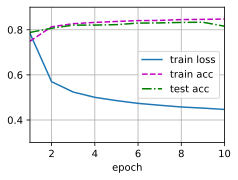

In [ ]:
loss = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 10
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimzer)

# 多层感知机


一般来说，有了激活函数，就不可能再将我们的多层感知机退化成线性模型：
$$\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}$$

## 激活函数

最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）， 因为它实现简单，同时在各种预测任务中表现良好。 ReLU提供了一种非常简单的非线性变换。 给定元素 𝑥 ，ReLU函数被定义为该元素与 0 的最大值：

ReLU(𝑥)=max(𝑥,0).
 
通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。

对于一个定义域在 ℝ 中的输入， sigmoid函数将输入变换为区间(0, 1)上的输出。 因此，sigmoid通常称为挤压函数（squashing function）： 它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$
 


与sigmoid函数类似， tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上。 tanh函数的公式如下：

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$
 
注意，当输入在0附近时，tanh函数接近线性变换。 函数的形状类似于sigmoid函数， 不同的是tanh函数关于坐标系原点中心对称。

## MLP-简洁实现


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
model = nn.Sequential(nn.Flatten(), nn.Linear(
    784, 256), nn.ReLU(), nn.Linear(256, 10))

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

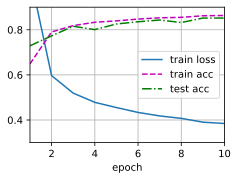

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimzer)

## 权重衰减 (加入正则项)


在训练参数化机器学习模型时， 权重衰减（weight decay）是最广泛使用的正则化的技术之一， 它通常也被称为 𝐿2 正则化。

一种简单的方法是通过线性函数  𝑓(𝐱)=𝐰⊤𝐱  中的权重向量的某个范数来度量其复杂性， 例如 ‖𝐰‖2 。 要保证权重向量比较小， 最常用方法是将其范数作为惩罚项加到最小化损失的问题中。 将原来的训练目标最小化训练标签上的预测损失， 调整为最小化预测损失和惩罚项之和。 现在，如果我们的权重向量增长的太大， 我们的学习算法可能会更集中于最小化权重范数 ‖𝐰‖2 。 这正是我们想要的。 让我们回顾一下 3.1节中的线性回归例子。 我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2$$

回想一下， 𝐱(𝑖) 是样本 𝑖 的特征，  𝑦(𝑖) 是样本 𝑖 的标签，  (𝐰,𝑏) 是权重和偏置参数。 为了惩罚权重向量的大小， 我们必须以某种方式在损失函数中添加 ‖𝐰‖2 ， 但是模型应该如何平衡这个新的额外惩罚的损失？ 实际上，我们通过正则化常数 𝜆 来描述这种权衡， 这是一个非负超参数，我们使用验证数据拟合：  
$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2$$

此外，你可能会问为什么我们首先使用 𝐿2 范数，而不是 𝐿1 范数。 事实上，这个选择在整个统计领域中都是有效的和受欢迎的。  **𝐿2 正则化线性模型构成经典的岭回归（ridge regression）算法**， **𝐿1 正则化线性回归是统计学中类似的基本模型， 通常被称为套索回归（lasso regression）**。 使用 𝐿2 范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。 这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。 在实践中，这可能使它们对单个变量中的观测误差更为稳定。 相比之下， 𝐿1 惩罚会导致模型将权重集中在一小部分特征上， 而将其他权重清除为零。 这称为特征选择（feature selection），这可能是其他场景下需要的。

In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(200, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减。
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 12.495962142944336


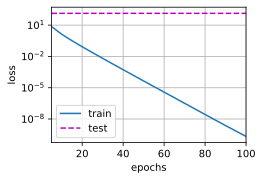

In [ ]:
train_concise(0)

w的L2范数： 0.3532167971134186


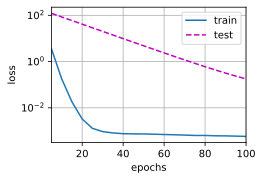

In [ ]:
train_concise(3)

## Dropout


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
  assert 0 <= dropout <= 1
  if dropout == 1:
    return torch.zeros_like(X)
  if dropout == 0:
    return X
  mask = (torch.randn(X.shape) > dropout).float()
  return X * mask / (1.0 - dropout)

  # 测试dropout
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0., 10., 12., 14.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


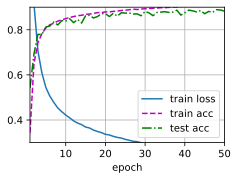

In [ ]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256), nn.ReLU(), nn.Dropout(0.2), 
    nn.Linear(256, 256), nn.ReLU(), nn.Dropout(0.5), 
    nn.Linear(256, 10)
)

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weight)

batch_size, lr, num_epochs = 256, 0.1, 50
loss = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimzer)

去掉 dropout:


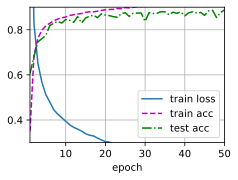

In [ ]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256), nn.ReLU(),
    nn.Linear(256, 256), nn.ReLU(),
    nn.Linear(256, 10)
)

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weight)

batch_size, lr, num_epochs = 256, 0.1, 50
loss = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimzer)

## 数值稳定性和模型初始化

### 数值稳定性

在反向传播算法更新参数时，可能会带来两种问题：
* 梯度消失
* 梯度爆炸

**梯度消失**： 曾经sigmoid函数 1/(1+exp(−𝑥))很流行， 因为它类似于阈值函数。 由于早期的人工神经网络受到生物神经网络的启发， 神经元要么完全激活要么完全不激活（就像生物神经元）的想法很有吸引力。 然而，它却是导致梯度消失问题的一个常见的原因。
正如你所看到的，当sigmoid函数的输入很大或是很小时，它的梯度都会消失。 此外，当反向传播通过许多层时，除非我们在刚刚好的地方， 这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。 当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。

**梯度爆炸**： 当网络模型层数较多，那么反向传播时也意味着要进行巨量的矩阵乘法，矩阵的乘积发生爆炸，梯度下降优化器无法收敛。

### 参数初始化

如果不指定初始化方法，PyTorch将 `Kaiming_uniform_` 使用默认的初始化方法。

**Xavier初始化**： 整个大型前馈神经网络无非就是一个超级大映射，将原始样本稳定的映射成它的类别。**也就是将样本空间映射到类别空间**。试想，如果样本空间与类别空间的分布差异很大，比如说类别空间特别稠密，样本空间特别稀疏辽阔，那么在类别空间得到的用于反向传播的误差丢给样本空间后简直变得微不足道，也就是会导致模型的训练非常缓慢。同样，如果类别空间特别稀疏，样本空间特别稠密，那么在类别空间算出来的误差丢给样本空间后简直是爆炸般的存在，即导致模型发散震荡，无法收敛。因此，我们要让样本空间与类别空间的分布差异（密度差别）不要太大，**也就是要让它们的方差尽可能相等**。

通常，Xavier初始化从均值为零，方差  $\sigma^2 = \frac{2}{n_\mathrm{in} + n_\mathrm{out}}$  的高斯分布中采样权重。 我们也可以利用Xavier的直觉来选择从均匀分布中抽取权重时的方差。 注意均匀分布 𝑈(−𝑎,𝑎) 的方差为 𝑎23 。 将 𝑎23 代入到 𝜎2 的条件中，将得到初始化值域：

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right)$$

## 实战预测房价


### 下载数据集


In [ ]:
import hashlib
import os
import tarfile
import zipfile
import requests

DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

def download(name, cache_dir=os.path.join('.', 'data')):  
  """下载一个DATA_HUB中的文件，返回本地文件名。"""
  assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
  url, sha1_hash = DATA_HUB[name]
  os.makedirs(cache_dir, exist_ok=True)
  fname = os.path.join(cache_dir, url.split('/')[-1])
  if os.path.exists(fname):
      sha1 = hashlib.sha1()
      with open(fname, 'rb') as f:
          while True:
              data = f.read(1048576)
              if not data:
                  break
              sha1.update(data)
      if sha1.hexdigest() == sha1_hash:
          return fname  # Hit cache
  print(f'正在从{url}下载{fname}...')
  r = requests.get(url, stream=True, verify=True)
  with open(fname, 'wb') as f:
      f.write(r.content)
  return fname

def download_extract(name, folder=None):  
  """下载并解压zip/tar文件。"""
  fname = download(name)
  base_dir = os.path.dirname(fname)
  data_dir, ext = os.path.splitext(fname)
  if ext == '.zip':
      fp = zipfile.ZipFile(fname, 'r')
  elif ext in ('.tar', '.gz'):
      fp = tarfile.open(fname, 'r')
  else:
      assert False, '只有zip/tar文件可以被解压缩。'
  fp.extractall(base_dir)
  return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  
  """下载DATA_HUB中的所有文件。"""
  for name in DATA_HUB:
      download(name)

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

DATA_HUB['kaggle_house_train'] = (
DATA_URL + 'kaggle_house_pred_train.csv',
'585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (
DATA_URL + 'kaggle_house_pred_test.csv',
'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_data.iloc[:4, [0, 1, 2, -3, -2, -1]])
print(test_data.iloc[:4, [0, 1, 2, -3, -2, -1]])

# 将id列从数据集中删除
all_features = pd.concat([train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]])

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning SaleType SaleCondition  SalePrice
0   1          60       RL       WD        Normal     208500
1   2          20       RL       WD        Normal     181500
2   3          60       RL       WD        Normal     223500
3   4          70       RL       WD       Abnorml     140000
     Id  MSSubClass MSZoning  YrSold SaleType SaleCondition
0  1461          20       RH    2010       WD        Normal
1  1462          20       RL    2010       WD        Normal
2  1463          60       RL    2010       WD        Normal
3  1464          60       RL    2010       WD        Normal


### 数据预处理


In [ ]:
# 返回值为数值的所有列名
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

# 对所有数值做归一化 normalization
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / x.std()
)

all_features[numeric_features] = all_features[numeric_features].fillna(0)
print(all_features[numeric_features])

      MSSubClass  LotFrontage   LotArea  ...   MiscVal    MoSold    YrSold
0       0.067320    -0.184443 -0.217841  ... -0.089577 -1.551918  0.157619
1      -0.873466     0.458096 -0.072032  ... -0.089577 -0.446848 -0.602858
2       0.067320    -0.055935  0.137173  ... -0.089577  1.026577  0.157619
3       0.302516    -0.398622 -0.078371  ... -0.089577 -1.551918 -1.363335
4       0.067320     0.629439  0.518814  ... -0.089577  2.131647  0.157619
...          ...          ...       ...  ...       ...       ...       ...
1454    2.419286    -2.069222 -1.043758  ... -0.089577 -0.078492 -1.363335
1455    2.419286    -2.069222 -1.049083  ... -0.089577 -0.815205 -1.363335
1456   -0.873466     3.884968  1.246594  ... -0.089577  1.026577 -1.363335
1457    0.655311    -0.312950  0.034599  ...  1.144116  0.289865 -1.363335
1458    0.067320     0.201080 -0.068608  ... -0.089577  1.763290 -1.363335

[2919 rows x 36 columns]


接下来，我们处理离散值。这包括诸如“MSZoning”之类的特征。我们用一次独热编码替换它们，方法与前面将多类别标签转换为向量的方式相同。例如，“MSZoning”包含值“RL”和“Rm”。将创建两个新的指示器特征“MSZoning_RL”和“MSZoning_RM”，其值为 0 或 1。根据独热编码，如果“MSZoning”的原始值为“RL”，则:“MSZoning_RL”为 1，“MSZoning_RM”为 0。pandas 软件包会自动为我们实现这一点


In [ ]:
# ‘dummy_na’参数将缺失值“na”视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
# 特征数从79增加到了331个
all_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,-0.934542,-0.444176,-0.773728,1.207172,-0.10118,0.413476,1.086464,-0.249767,0.781232,1.232388,0.169898,-0.207663,0.986680,-0.924153,0.973110,0.306423,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,-0.629681,0.476948,0.261030,-0.784891,-0.10118,-0.471810,-0.819258,3.820454,0.781232,-0.756191,0.169898,-0.207663,-0.287709,0.623525,-0.082638,0.306423,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,-0.288418,-0.298974,-0.610614,1.235163,-0.10118,0.563659,1.086464,-0.249767,0.781232,1.232388,0.169898,-0.207663,-0.287709,0.623525,0.894907,0.306423,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,-0.047258,-0.671053,-0.506118,0.978574,-0.10118,0.427309,1.086464,-0.249767,-1.027187,-0.756191,0.169898,-0.207663,0.349486,0.623525,0.777601,1.619406,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,-0.161013,0.211501,-0.037164,1.671364,-0.10118,1.377806,1.086464,-0.249767,0.781232,1.232388,1.385418,-0.207663,1.623875,0.623525,0.855805,1.619406,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


通过 values 属性，从 pandas 对象中提取 numpy 格式，并将其转化为张量


In [ ]:
n_train = train_data.shape[0]
train_features = torch.tensor(
    all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(
    all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
  train_data['SalePrice'].values.reshape(-1, 1), dtype=torch.float32
)

### 训练


对于房价，就像股票价格一样，我们关心的是相对数量，而不是绝对数量。因此，[**我们更关心相对误差$\frac{y - \hat{y}}{y}$，**]而不是绝对误差$y - \hat{y}$。例如，如果我们在俄亥俄州农村地区估计一栋房子的价格时，我们的预测偏差了 10 万美元，在那里一栋典型的房子的价值是 12.5 万美元，那么我们可能做得很糟糕。另一方面，如果我们在加州豪宅区的预测出现了这个数字的偏差，这可能是一个惊人的准确预测（在那里，房价均值超过 400 万美元）。

(**解决这个问题的一种方法是用价格预测的对数来衡量差异**)。事实上，这也是比赛中官方用来评价提交质量的误差指标。即将 $\delta$ for $|\log y - \log \hat{y}| \leq \delta$转换为$e^{-\delta} \leq \frac{\hat{y}}{y} \leq e^\delta$。这使得预测价格的对数与真实标签价格的对数之间出现以下均方根误差：

$$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$


In [ ]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

# todo 定义模型
model = nn.Sequential(nn.Linear(in_features, 1))
# model = nn.Sequential(nn.Linear(in_features, 24), nn.ReLU(), nn.Linear(24, 1))

def log_rmse(model, features, labels):
  # 为了在取对数时进一步稳定数值，将小于1的数值设为1
  clipped_pred = torch.clamp(model(features), 1, float('inf'))
  rmse = torch.sqrt(loss(torch.log(clipped_pred), torch.log(labels)))
  return rmse.item()

In [ ]:
def train(model, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(model(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(model, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(model, test_features, test_labels))
    return train_ls, test_ls

### K 折交叉验证


函数在 𝐾 折交叉验证过程中返回第 𝑖 折的数据。它选择第 𝑖 个切片作为验证数据，其余部分作为训练数据


In [ ]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

# 在K折交叉验证中训练K次后，返回训练和验证误差的平均值
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
  train_l_sum, valid_l_sum = 0, 0
  for i in range(k):
    data = get_k_fold_data(k, i, X_train, y_train)
    train_ls, valid_ls = train(model, *data, num_epochs, learning_rate, weight_decay, batch_size)
    train_l_sum += train_ls[-1]
    valid_l_sum += valid_ls[-1]
    if i == 0:
      d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                legend=['train', 'valid'], yscale='log')
    print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
          f'valid log rmse {float(valid_ls[-1]):f}')
  return train_l_sum / k, valid_l_sum / k

### 调参


fold 1, train log rmse 0.127490, valid log rmse 0.166910
fold 2, train log rmse 0.116131, valid log rmse 0.175255
fold 3, train log rmse 0.113887, valid log rmse 0.161479
fold 4, train log rmse 0.118564, valid log rmse 0.161420
fold 5, train log rmse 0.109354, valid log rmse 0.176872
5-折验证: 平均训练log rmse: 0.117085, 平均验证log rmse: 0.168387


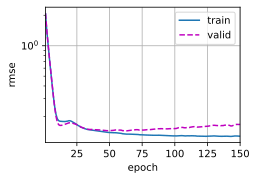

In [ ]:
# todo 调整参数
k, num_epochs, lr, weight_decay, batch_size = 5, 150, 100, 0, 256
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, 'f'平均验证log rmse: {float(valid_l):f}')

### 提交预测文件


train log rmse 0.115460


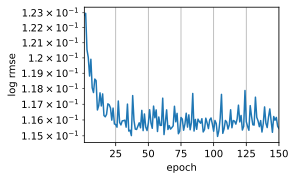

In [ ]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    train_ls, _ = train(model, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = model(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

# pytorch自定义

## 层和块
层可以是块，块也可以由多个层组合成，块也可以由许多块组成

### 自定义块

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    # 定义初始化函数，并继承父类的初始化函数
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.out = nn.Linear(256, 10)

    # 定义正向传播函数，即如何根据输入'X'返回所需的模型输出
    def forward(self, X):
        return self.out(F.relu(self.hidden(X)))

In [ ]:
X = torch.rand(2, 20)
model = MLP()
model(X)    # 实际上是model.__call__(X)的简写

tensor([[-0.0638,  0.0405,  0.1176, -0.0086,  0.2508,  0.0772, -0.1268, -0.0441,
          0.2243,  0.0281],
        [ 0.0222,  0.2017,  0.3159, -0.0316,  0.0506,  0.0158, -0.0207, -0.0888,
          0.2370,  0.0013]], grad_fn=<AddmmBackward>)

### 顺序块

In [ ]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for block in args:
            # ‘block’是‘Module’子类的一个实例
            # 将它保存在‘Module’类的成员变量‘_modules’中。block的类型是OrderDict
            self._modules[block] = block
    
    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

In [ ]:
# 以自定义的MySequential类实现多层感知机
model = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
model(X)

tensor([[ 0.2853,  0.1048, -0.0979, -0.5248, -0.0588,  0.0752, -0.0619,  0.2529,
         -0.1641,  0.0362],
        [ 0.1978, -0.0732, -0.0154, -0.4152, -0.0339,  0.1477,  0.0851,  0.2337,
         -0.0277, -0.1815]], grad_fn=<AddmmBackward>)

### 在正向传播中执行代码

In [ ]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变。
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及`relu`和`dot`函数。
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数。
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

# 在这个FixedHiddenMLP模型中，我们实现了一个隐藏层， 其权重（self.rand_weight）在实例化时被随机初始化，之后为常量。 这个权重不是一个模型参数，因此它永远不会被反向传播更新。 然后，神经网络将这个固定层的输出通过一个全连接层。

# 注意，在返回输出之前，模型做了一些不寻常的事情： 它运行了一个while循环，在 𝐿1 范数大于 1 的条件下， 将输出向量除以 2 ，直到它满足条件为止。 最后，模型返回了X中所有项的和。

In [ ]:
# 混搭组合块
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP())
chimera(X)

tensor(-0.0788, grad_fn=<SumBackward0>)

## 参数管理
提取模型参数，将模型保存到磁盘

### 参数访问

In [9]:
import torch
from torch import nn

model = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(2, 4)
model(X)

# 输出第二个全连接层的参数
print(model[2].state_dict())

OrderedDict([('weight', tensor([[ 0.1280,  0.1075,  0.1353,  0.0169,  0.1810,  0.2096, -0.3521, -0.0582]])), ('bias', tensor([0.2024]))])


输出的结果告诉我们一些重要的事情： 首先，这个全连接层包含两个参数，分别是该层的权重和偏置。 两者都存储为单精度浮点数（float32）。 注意，参数名称允许唯一标识每个参数，即使在包含数百个层的网络中也是如此。

注意，每个参数都表示为参数类的一个实例。 要对参数执行任何操作，首先我们需要访问底层的数值。 有几种方法可以做到这一点。有些比较简单，而另一些则比较通用。 下面的代码从第二个全连接层（即第三个神经网络层）提取偏置， 提取后返回的是一个参数类实例，并进一步访问该参数的值。

In [ ]:
print(type(model[2].bias), '\n')
print(model[2].bias, '\n')
print(model[2].bias.data, '\n')

# 访问参数的梯度（尚未调用反向传播，梯度为空）
print(model[2].weight.grad)

<class 'torch.nn.parameter.Parameter'> 

Parameter containing:
tensor([0.2997], requires_grad=True) 

tensor([0.2997]) 

None


In [ ]:
# 访问单层的参数
print(*[(name, param.shape) for name, param in model[2].named_parameters()])
# 访问所有层的参数
print(*[(name, param.shape) for name, param in model.named_parameters()])

('weight', torch.Size([1, 8])) ('bias', torch.Size([1]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [ ]:
model.state_dict()['2.weight']

tensor([[ 0.1278,  0.2720, -0.2247, -0.1231,  0.3182,  0.2574, -0.0326,  0.1897]])

从嵌套块中收集参数

In [ ]:
def block1():
    return nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                         nn.Linear(8, 4), nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
# 访问第一个主要的块，第二个子块的第一层的偏置
rgnet[0][1][0].bias

Parameter containing:
tensor([ 0.0772,  0.3890, -0.4731,  0.0369,  0.3589, -0.0993, -0.2442, -0.4522],
       requires_grad=True)

### 参数初始化

让我们首先调用内置的初始化器。 下面的代码将所有权重参数初始化为标准差为0.01的高斯随机变量， 且将偏置参数设置为0。

In [ ]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)
model.apply(init_normal)
model[0].weight.data[0], model[0].bias.data[0]

# 还可以将参数全部初始化为常数
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)
model.apply(init_constant)
model[0].weight.data[0], model[0].bias.data[0]

我们还可以对某些块应用不同的初始化方法。 例如，下面我们使用Xavier初始化方法初始化第一个神经网络层， 然后将第三个神经网络层初始化为常量值42。

In [ ]:
# 使用内置的方法初始化参数
def xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def other_init(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

model[0].apply(xavier)
model[2].apply(other_init)
print(model[0].weight)
print(model[2].weight)

Parameter containing:
tensor([[-0.3099,  0.1264,  0.1087, -0.1645],
        [-0.6554, -0.0273,  0.2307, -0.6424],
        [ 0.1864,  0.1768,  0.2587, -0.3983],
        [ 0.6890,  0.0866,  0.0066, -0.1103],
        [ 0.2466, -0.1257,  0.4634,  0.3309],
        [ 0.2309, -0.0800,  0.5224,  0.2984],
        [-0.0420,  0.4159, -0.5859, -0.3531],
        [ 0.3238, -0.6030,  0.6181,  0.5245]], requires_grad=True)
Parameter containing:
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]], requires_grad=True)


### 参数绑定（在多个层间共享参数）

In [ ]:
# 我们需要给共享层一个名称，以便可以引用它的参数。
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))
net(X)
print(net)

# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])
# 确保它们实际上是同一个对象，而不只是有相同的值。
net[2].weight.data[0, 0] = 100
print(net[2].weight.data[0] == net[4].weight.data[0])

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)
tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


当参数绑定时，梯度会发生什么情况？ 答案是由于模型参数包含梯度，因此在反向传播期间第二个隐藏层 （即第三个神经网络层）和第三个隐藏层（即第五个神经网络层）的梯度会加在一起。

## 自定义层

定义一个不带参数的自定义层，实现一个从输入中减去其均值的操作。要构建它，只需要继承基础层类并实现前向传播功能。

In [14]:
import torch
import torch.nn.functional as F
from torch import nn

# 构造一个没有任何参数的自定义层
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [15]:
# 将自定义层合并到某个模型中去
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())
Y = net(torch.rand(4, 8))
Y.shape

torch.Size([4, 128])

下面构建一个带参数的自定义层。

In [ ]:
import torch.nn.functional as F
# 该层需要两个参数，一个用于表示权重，另一个用于表示偏置项。在此实现中，我们使用ReLU作为激活函数。该层需要输入参数：in_units和units，分别表示输入和输出的数量。
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)

In [ ]:
linear = MyLinear(5, 3)
print(linear.weight, '\n')

print(linear(torch.rand(2, 5)), '\n')

Parameter containing:
tensor([[ 0.9619,  0.1521, -0.2376],
        [ 0.2166,  0.6311, -0.3490],
        [-0.2227, -0.5268, -0.2811],
        [ 2.5194, -1.3637,  0.0126],
        [ 0.2344,  1.4552,  0.4732]], requires_grad=True) 

tensor([[1.7884, 0.0000, 0.4551],
        [1.0004, 0.0000, 0.3329]]) 



## 读写文件

### 加载和保存张量

对于单个张量，我们可以直接调用load和save函数分别读写它们。 这两个函数都要求我们提供一个名称，save要求将要保存的变量作为输入。

In [ ]:
x = torch.arange(4)
torch.save(x, 'x-file')
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [ ]:
y = torch.zeros(4)
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

我们甚至可以写入或读取从字符串映射到张量的字典。 当我们要读取或写入模型中的所有权重时，这很方便。

In [ ]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

### 加载和保存模型参数

为了恢复模型，需要先用代码生成架构，然后从磁盘加载参数。

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

torch.save(net.state_dict(), 'mlp.params')

为了恢复模型，我们实例化了原始多层感知机模型的一个备份。 这里我们不需要随机初始化模型参数，而是直接读取文件中存储的参数。

In [ ]:
# 读取文件中存储的参数
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

## GPU

定义了两个方便的函数， 这两个函数允许我们在不存在所需所有GPU的情况下运行代码。

In [16]:
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cpu'), device(type='cpu'), [device(type='cpu')])

# 卷积神经网络

关于CNN的小结：

* 图像的平移不变性使我们以相同的方式处理局部图像，而不在乎它的位置。

* 局部性意味着计算相应的隐藏表示只需一小部分局部图像像素。

* 在图像处理中，卷积层通常比全连接层需要更少的参数，但依旧获得高效用的模型。

* 卷积神经网络（CNN）是一类特殊的神经网络，它可以包含多个卷积层。

* 多个输入和输出通道使模型在每个空间位置可以获取图像的多方面特征。

## 图像卷积

### 互相关计算（卷积核过滤）

严格来说，卷积层是个错误的叫法，因为它所表达的运算其实是互相关运算（cross-correlation），而不是卷积运算。 根据 6.1节中的描述，在卷积层中，输入张量和核张量通过互相关运算产生输出张量。

<center><img src='https://zh-v2.d2l.ai/_images/correlation.svg'></center>

In [8]:
import torch
from torch import nn
# from d2l import torch as d2l


def corr2d(X, K):  #@save
    """计算二维互相关运算。"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
            print(X[i:i + h, j:j + w] * K)
            print((X[i:i + h, j:j + w] * K).sum())
            print()
    return Y

In [9]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[ 0.,  1.],
        [ 6., 12.]])
tensor(19.)

tensor([[ 0.,  2.],
        [ 8., 15.]])
tensor(25.)

tensor([[ 0.,  4.],
        [12., 21.]])
tensor(37.)

tensor([[ 0.,  5.],
        [14., 24.]])
tensor(43.)



tensor([[19., 25.],
        [37., 43.]])

### 卷积层

In [ ]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

图像中的边缘检测

如下是卷积层的一个简单应用：通过找到像素变化的位置，来检测图像中不同颜色的边缘。 首先，我们构造一个 6×8 像素的黑白图像。中间四列为黑色（ 0 ），其余像素为白色（ 1 ）。

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
# 构造一个高为1，宽为2的卷积核，进行互相关运算时，如果水平相邻两元素相同则输出1，反之0
K = torch.tensor([[1., -1.]])
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

学习卷积核

现在让我们看看是否可以通过仅查看“输入-输出”对来学习由X生成Y的卷积核。 我们先构造一个卷积层，并将其卷积核初始化为随机张量。接下来，在每次迭代中，我们比较Y与卷积层输出的平方误差，然后计算梯度来更新卷积核。为了简单起见，我们在此使用内置的二维卷积层，并忽略偏置。

In [ ]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # 迭代卷积核
    conv2d.weight.data[:] -= 3e-2 * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'batch {i+1}, loss {l.sum():.3f}')

batch 2, loss 7.909
batch 4, loss 1.871
batch 6, loss 0.537
batch 8, loss 0.181
batch 10, loss 0.068


In [ ]:
conv2d.weight.data.reshape(1, 2)

tensor([[ 0.9616, -1.0136]])

### 特征映射和感受野

卷积运算后的输出有时被称为**特征映射**（feature map），因为它可以被视为一个输入映射到下一层的空间维度的转换器。 在卷积神经网络中，对于某一层的任意元素 𝑥 ，其**感受野**（receptive field）是指在前向传播期间可能影响 𝑥 计算的所有元素（来自所有先前层）。

请注意，感受野可能大于输入的实际大小。 给定 2×2 卷积核，阴影输出元素值 19 的感受野是输入阴影部分的四个元素。 假设之前输出为 𝐘 ，其大小为 2×2 ，现在我们在其后附加一个卷积层，该卷积层以 𝐘 为输入，输出单个元素 𝑧 。 在这种情况下， 𝐘 上的 𝑧 的感受野包括 𝐘 的所有四个元素，而输入的感受野包括最初所有九个输入元素。 因此，当一个特征图中的任意元素需要检测更广区域的输入特征时，我们可以构建一个更深的网络。

## 填充与步幅

### 填充

在前面的例子中，输入的高度和宽度都为 3 ，卷积核的高度和宽度都为 2 ，生成的输出表征的维数为 2×2 。 正如我们在 6.2节中所概括的那样，假设输入形状为 $n_h \times n_w$ ，卷积核形状为 $k_h \times k_w$ ，那么输出形状将是$(n_h-k_h+1) \times (n_w-k_w+1)$ 。 因此，卷积的输出形状取决于输入形状和卷积核的形状。

如上所述，在应用多层卷积时，我们常常丢失边缘像素。 由于我们通常使用小卷积核，因此对于任何单个卷积，我们可能只会丢失几个像素。 但随着我们应用许多连续卷积层，累积丢失的像素数就多了。 解决这个问题的简单方法即为填充（padding）：在输入图像的边界填充元素（通常填充元素是 0 ）。

我们将 3×3 输入填充到 5×5 ，那么它的输出就增加为 4×4 。阴影部分是第一个输出元素以及用于输出计算的输入和核张量元素：  0×0+0×1+0×2+0×3=0 。

<center><img src='https://zh-v2.d2l.ai/_images/conv-pad.svg'></center>

通常，如果我们添加 $p_h$ 行填充（大约一半在顶部，一半在底部）和 $𝑝_𝑤$ 列填充（左侧大约一半，右侧一半），则输出形状将为：


$$(𝑛_ℎ−𝑘_ℎ+𝑝_ℎ+1) \times (𝑛_𝑤−𝑘_𝑤+𝑝_𝑤+1)$$
 
这意味着输出的高度和宽度将分别增加 $𝑝_ℎ$ 和 $𝑝_𝑤$ 。

**在许多情况下，我们需要设置 $𝑝_ℎ=𝑘_ℎ−1$ 和 $𝑝_𝑤=𝑘_𝑤−1$ ，使输入和输出具有相同的高度和宽度。** 这样可以在构建网络时更容易地预测每个图层的输出形状。假设 $𝑘_ℎ$ 是奇数，我们将在高度的两侧填充 $𝑝_ℎ/2$ 行。 如果 $𝑘_ℎ$ 是偶数，则一种可能性是在输入顶部填充 $⌈𝑝_ℎ/2⌉$ 行，在底部填充 $⌊𝑝_ℎ/2⌋$ 行。同理，我们填充宽度的两侧。

卷积神经网络中卷积核的高度和宽度通常为奇数，例如1、3、5或7。 **选择奇数的好处是，保持空间维度的同时，我们可以在顶部和底部填充相同数量的行，在左侧和右侧填充相同数量的列。**

此外，使用奇数的核大小和填充大小也提供了书写上的便利。对于任何二维张量X，当满足：
1. 卷积核的大小是奇数；
2. 所有边的填充行数和列数相同；
3. 输出与输入具有相同高度和宽度 则可以得出：输出Y[i, j]是通过以输入X[i, j]为中心，与卷积核进行互相关计算得到的。

In [ ]:
import torch
from torch import nn

# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    print(X.shape)
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([1, 1, 8, 8])


torch.Size([8, 8])

### 步幅

我们将每次滑动元素的数量称为步幅（stride）。

通常，当垂直步幅为 $𝑠_ℎ$ 、水平步幅为 $𝑠_𝑤$ 时，输出形状为：
$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

如果我们设置了 $𝑝_ℎ=𝑘_ℎ−1$ 和 $𝑝_𝑤=𝑘_𝑤−1$ ，则输出形状将简化为 $⌊(𝑛_ℎ+𝑠_ℎ−1)/𝑠_ℎ⌋×⌊(𝑛_𝑤+𝑠_𝑤−1)/𝑠_𝑤⌋$ 。 更进一步，如果输入的高度和宽度可以被垂直和水平步幅整除，则输出形状将为 $(𝑛_ℎ/𝑠_ℎ)×(𝑛_𝑤/𝑠_𝑤)$ 。

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([1, 1, 8, 8])


torch.Size([4, 4])

通常情况下，很少使用不一致的填充和步幅值。因此有 $p_h = p_w = p$ 和 $s_h = s_w = s$。

## 多输入多输出通道

### 多输入

当输入包含多个通道时，需要构造一个与输入数据具有相同输入通道数的卷积核，以便与输入数据进行互相关运算。

当我们添加通道时，我们的输入和隐藏的表示都变成了三维张量。例如，每个RGB输入图像具有 3× h × w 的形状。我们将这个大小为 3 的轴称为通道（channel）维度。在本节中，我们将更深入地研究具有多输入和多输出通道的卷积核。

我们演示了一个具有两个输入通道的二维互相关运算的示例。阴影部分是第一个输出元素以及用于计算这个输出的输入和核张量元素： (1×1+2×2+4×3+5×4)+(0×0+1×1+3×2+4×3)=56 。

<center><img src="https://zh-v2.d2l.ai/_images/conv-multi-in.svg" /></center>

### 多输出

直观地说，我们可以将每个通道看作是对不同特征的响应。而现实可能更为复杂一些，因为每个通道不是独立学习的，而是为了共同使用而优化的。因此，多输出通道并不仅是学习多个单通道的检测器。

用 $𝑐_𝑖$ 和 $𝑐_𝑜$ 分别表示输入和输出通道的数目，并让 $𝑘_ℎ$ 和 $𝑘_𝑤$ 为卷积核的高度和宽度。为了获得多个通道的输出，我们可以为每个输出通道创建一个形状为 $c_i\times k_h\times k_w$ 的卷积核张量，这样卷积核的形状是 $$c_o\times c_i\times k_h\times k_w$$  
在互相关运算中，每个输出通道先获取所有输入通道，再以对应该输出通道的卷积核计算出结果。

## 汇聚层

本节将介绍汇聚（pooling）层，它具有双重目的：降低卷积层对位置的敏感性，同时降低对空间降采样表示的敏感性。

与卷积层类似，汇聚层运算符由一个固定形状的窗口组成，该窗口根据其步幅大小在输入的所有区域上滑动，为固定形状窗口（有时称为汇聚窗口）遍历的每个位置计算一个输出。 然而，不同于卷积层中的输入与卷积核之间的互相关计算，汇聚层不包含参数。 相反，池运算是确定性的，我们通常计算汇聚窗口中所有元素的最大值或平均值。这些操作分别称为最大汇聚层（maximum pooling）和平均汇聚层（average pooling）。

* maxpooling 在汇聚窗口内选择最大值作为输出
* avgpooling 在汇聚窗口内计算平均值作为输出
<center><img src="https://zh-v2.d2l.ai/_images/pooling.svg" /></center>

In [15]:
def pool2d(X, size, mode='max'):
    Y = torch.zeros(X.shape[0] - size + 1, X.shape[1] - size +1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i+size, j:j+size].max()
            if mode == 'avg':
                Y[i, j] = X[i:i+size, j:j+size].mean()
    return Y

In [16]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, 2)

tensor([[4., 5.],
        [7., 8.]])

In [17]:
pool2d(X, 2, 'avg')

tensor([[2., 3.],
        [5., 6.]])

池化层也同样可以设置填充与步幅，以及多输入和多输出通道。

* 默认情况下，**深度学习框架中的步幅与汇聚窗口的大小相同**。  
  因此，如果我们使用形状为(3, 3)的汇聚窗口，那么默认情况下，我们得到的步幅形状为(3, 3)。
* 在处理多通道输入数据时，汇聚层在每个输入通道上单独运算，而不是像卷积层一样在通道上对输入进行汇总。 这意味着汇聚层的输出通道数与输入通道数相同。

In [11]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
pool2d = torch.nn.MaxPool2d(3)
display(pool2d(X))

pool2d = torch.nn.MaxPool2d(3, padding=1, stride=2)
display(pool2d(X))

tensor([[[[10.]]]])

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## LeNet

<center><img src="https://zh-v2.d2l.ai/_images/lenet-vert.svg" /></center>

In [ ]:
import torch 
from torch import nn
from d2l import torch as d2l

# 因为要给nn.Sequential用，必须为继承nnModule的子类
class Reshape(nn.Module):
    def forward(self, x):
        return x.reshape(-1, 1, 28, 28)

model = nn.Sequential(
    Reshape(),
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(6, 16, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.ReLU(),

    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)

In [ ]:
# 打印每层的情况
X = torch.rand((1, 1, 28, 28), dtype=torch.float32)
for layer in model:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: ', X.shape)

Reshape output shape:  torch.Size([1, 1, 28, 28])
Conv2d output shape:  torch.Size([1, 6, 28, 28])
MaxPool2d output shape:  torch.Size([1, 6, 14, 14])
Conv2d output shape:  torch.Size([1, 16, 10, 10])
ReLU output shape:  torch.Size([1, 16, 10, 10])
MaxPool2d output shape:  torch.Size([1, 16, 5, 5])
Flatten output shape:  torch.Size([1, 400])
Linear output shape:  torch.Size([1, 120])
ReLU output shape:  torch.Size([1, 120])
Linear output shape:  torch.Size([1, 84])
ReLU output shape:  torch.Size([1, 84])
Linear output shape:  torch.Size([1, 10])


In [ ]:
import torchvision
from torch.utils import data
from torchvision import transforms
def load_data_fashion_mnist(batch_size, resize=None):  # @save
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使用GPU计算模型在数据集上的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # BERT微调所需的（之后将介绍）
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
def train_ch6(model, train_iter, test_iter, num_epochs, lr, device):
    """使用GPU"""
    def init_weight(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    model.apply(init_weight)
    print('training on', device)
    model.to(device)
    optimzer = torch.optim.SGD(model.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        model.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimzer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = model(X)
            l = loss(y_hat, y)
            l.backward()
            optimzer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(model, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.410, train acc 0.851, test acc 0.842
17072.2 examples/sec on cuda:0


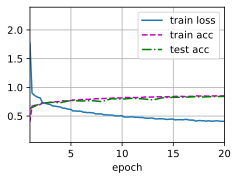

In [ ]:
lr, num_epochs = 0.01, 20
train_ch6(model, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# 现代卷积神经网络

## AlexNet
[AlexNet](./modern-CNN/AlexNet.ipynb)

## VGG
[VGG](./modern-CNN/VGG.ipynb)

## NiN
[NiN](./modern-CNN/NiN.ipynb)

## 批量归一化BatchNorm

回顾一下训练神经网络中出现的一些实际挑战：  

首先，数据预处理的方式通常会对最终结果产生巨大影响。使用真实数据时，我们的第一步是标准化输入特征，使其平均值为0，方差为1。 直观地说，这种标准化可以很好地与我们的优化器配合使用，因为它可以将参数的量级进行统一。  

第二，对于典型的多层感知机或卷积神经网络。当我们训练时，中间层中的变量（例如，多层感知机中的仿射变换输出）可能具有更广的变化范围：不论是沿着从输入到输出的层，跨同一层中的单元，或是随着时间的推移，模型参数的随着训练更新变幻莫测。 批量规范化的发明者非正式地假设，这些变量分布中的这种偏移可能会阻碍网络的收敛。 直观地说，我们可能会猜想，如果一个层的可变值是另一层的100倍，这可能需要对学习率进行补偿调整。  

第三，更深层的网络很复杂，容易过拟合。 这意味着正则化变得更加重要。

批量规范化应用于单个可选层（也可以应用到所有层），其原理如下：  
在每次训练迭代中，我们首先规范化输入，即通过减去其均值并除以其标准差，其中两者均基于当前小批量处理。 接下来，我们应用比例系数和比例偏移。 正是由于这个基于批量统计的标准化，才有了批量规范化的名称。

从形式上来说，用$\mathbf{x} \in \mathcal{B}$表示一个来自小批量$\mathcal{B}$的输入，批量规范化 BN 根据以下表达式转换 $\bf{x}$ ：

$$\mathrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}$$

在上式中， $\hat{\boldsymbol{\mu}}_\mathcal{B}$是小批量$\mathcal{B}$的样本均值，$\hat{\boldsymbol{\sigma}}_\mathcal{B}$是小批量$\mathcal{B}$的样本标准差。
应用标准化后，生成的小批量的平均值为0和单位方差为1。
由于单位方差（与其他一些魔法数）是一个主观的选择，因此我们通常包含
*拉伸参数*（scale）$\boldsymbol{\gamma}$和*偏移参数*（shift）$\boldsymbol{\beta}$，它们的形状与$\mathbf{x}$相同。
请注意，$\boldsymbol{\gamma}$和$\boldsymbol{\beta}$是需要与其他模型参数一起学习的参数。

通常，我们将批量规范化层置于全连接层中的仿射变换和激活函数之间。例如：
$$\mathbf{h} = \phi(\mathrm{BN}(\mathbf{W}\mathbf{x} + \mathbf{b}) )$$

同样，对于卷积层，我们可以在卷积层之后和激活函数之前应用批量规范化。当卷积有多个输出通道时，我们需要对这些通道的“每个”输出执行批量规范化，每个通道都有自己的拉伸（scale）和偏移（shift）参数，这两个参数都是标量。 假设我们的小批量包含 𝑚 个样本，并且对于每个通道，卷积的输出具有高度 𝑝 和宽度 𝑞 。 那么对于卷积层，我们在每个输出通道的 𝑚⋅𝑝⋅𝑞 个元素上同时执行每个批量规范化。

In [ ]:
# 实现BatchNorm, 应用于全连接层和卷积层


def BatchNorm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 判断是在训练还是推理
    if torch.no_grad_enable():
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        # fc层
        if len(X.shape) == 2:
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        # 二维卷积
        elif len(X.shape) == 4:
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)

        # 更新均值和方差
        moving_mean = momentum * moving_mean + (1 - momentum) * mean
        moving_var = momentum * moving_var + (1 - momentum) * var
    
    # 缩放和平移
    Y = gamma * X_hat + beta
    return Y, moving_mean, moving_var

In [8]:
x = torch.randint(0, 10, (2, 2, 2, 2), dtype=float)
mean = x.mean(dim=(0, 2, 3), keepdim=True)
x

tensor([[[[7., 6.],
          [6., 1.]],

         [[8., 4.],
          [1., 0.]]],


        [[[2., 4.],
          [3., 1.]],

         [[5., 3.],
          [3., 5.]]]], dtype=torch.float64)

In [10]:
mean.shape

torch.Size([1, 2, 1, 1])

In [28]:
# 使用pytorch的BatchNorm层
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), 
    nn.BatchNorm2d(6), 
    nn.Sigmoid(),
    
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), 
    nn.BatchNorm2d(16), 
    nn.Sigmoid(),

    nn.MaxPool2d(kernel_size=2, stride=2), 
    nn.Flatten(),
    
    nn.Linear(256, 120), 
    nn.BatchNorm1d(120), 
    nn.Sigmoid(),
    
    nn.Linear(120, 84), 
    nn.BatchNorm1d(84), 
    nn.Sigmoid(),
    nn.Linear(84, 10))

loss 0.257, train acc 0.904, test acc 0.821
16576.1 examples/sec on cuda:0


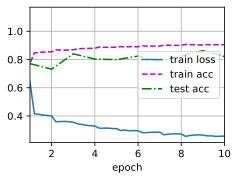

In [ ]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## ResNet
[ResNet](./modern-CNN/ResNet.ipynb)

In [44]:
class Residual(nn.Module):
    def __init__(self, in_channel, out_channel, use_conv1x1=False, stride=1):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1)
        if use_conv1x1:
            self.conv3 = nn.Conv2d(in_channel, out_channel, kernel_size=1, stride=stride)
        else:
            self.conv3 = None

        self.bn1 = nn.BatchNorm2d(out_channel)
        self.bn2 = nn.BatchNorm2d(out_channel)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.bn1(y)
        print(f'1st y shape: {y.shape}')

        y = self.conv2(y)
        y = self.bn2(y)
        print(f'2nd y shape: {y.shape}')

        if self.conv3:
            x = self.conv3(x)

        y += x
        return F.relu(y)

In [45]:
block = Residual(3, 3)
X = torch.rand(4, 3, 6, 6)
Y = block(X)
Y.shape

1st y shape: torch.Size([4, 3, 6, 6])
2nd y shape: torch.Size([4, 3, 6, 6])


torch.Size([4, 3, 6, 6])

In [52]:
z = torch.rand(4, 3, 18, 18)
pool = nn.MaxPool2d(2, stride=1)

pool(z).shape

torch.Size([4, 3, 17, 17])

In [46]:
blk = Residual(3, 6, use_conv1x1=True, stride=2)
blk(X).shape

1st y shape: torch.Size([4, 6, 3, 3])
2nd y shape: torch.Size([4, 6, 3, 3])


torch.Size([4, 6, 3, 3])

In [ ]:
block1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(3, stride=2, padding=1),
)

## DenseNet

### 稠密块

DenseNet 使用了 ResNet 改良版的“批量归一化、激活和卷积”结构

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels),
        nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1))

一个稠密块由多个卷积块组成，每个卷积块使用相同数量的输出通道。 然而，在前向传播中，我们将每个卷积块的输入和输出在通道维上连结。

In [3]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # 连接通道维度上每个块的输入和输出
            X = torch.cat((X, Y), dim=1)
        return X

我们定义一个有 2 个输出通道数为 10 的 DenseBlock。 使用通道数为 3 的输入时，我们会得到通道数为  3+2×10=23  的输出。 卷积块的通道数控制了输出通道数相对于输入通道数的增长，因此也被称为增长率（growth rate）。

In [4]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

### 过渡层
由于每个稠密块都会带来通道数的增加，使用过多则会过于复杂化模型。 而过渡层可以用来控制模型复杂度。 它通过  1×1  卷积层来减小通道数，并使用步幅为 2 的平均汇聚层减半高和宽，从而进一步降低模型复杂度。

In [5]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels),
        nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

输出通道数减为10，并将图片高宽减半。

In [6]:
blk = transition_block(23, 10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

### DenseNet模型

DenseNet 首先使用同 ResNet 一样的单卷积层和最大汇聚层。

In [7]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

接下来，类似于 ResNet 使用的 4 个残差块，DenseNet 使用的是 4 个稠密块。 与 ResNet 类似，我们可以设置每个稠密块使用多少个卷积层。 这里我们设成 4，从而与 7.6节 的 ResNet-18 保持一致。 稠密块里的卷积层通道数（即增长率）设为 32，所以每个稠密块将增加 128 个通道。

在每个模块之间，ResNet 通过步幅为 2 的残差块减小高和宽，DenseNet 则使用过渡层来减半高和宽，并减半通道数。

In [8]:
# `num_channels`为当前的通道数
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    # 上一个稠密块的输出通道数
    num_channels += num_convs * growth_rate
    # 在稠密块之间添加一个转换层，使通道数量减半
    if i != len(num_convs_in_dense_blocks) - 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2

In [9]:
net = nn.Sequential(
    b1, *blks,
    nn.BatchNorm2d(num_channels), nn.ReLU(),
    nn.AdaptiveMaxPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(num_channels, 10))

loss 0.150, train acc 0.945, test acc 0.883
781.7 examples/sec on cuda:0


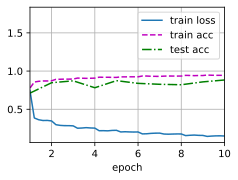

In [10]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())